# 순환신경망 (Recurrent Neural Network, RNN)

In [50]:
from tensorflow.keras.datasets import imdb
from tensorflow import keras
from sklearn.model_selection import train_test_split

- 데이터 준비

In [51]:
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

print(train_input.shape, test_input.shape) # (25000,) (25000,)
print(len(train_input[0])) # 첫 번째 리뷰 218
print(len(train_input[1])) # 두 번째 리뷰 189
print(test_target)

(25000,) (25000,)
218
189
[0 1 1 ... 0 0 0]


- 참고: 리뷰 원본 데이터 복원

In [52]:
word_to_idx = imdb.get_word_index()
idx_to_word = {}

for key, value in word_to_idx.items():
    idx_to_word[value+3] = key

for idx, token in enumerate(("<pad>", "<sos>", "<unk>")):
    idx_to_word[idx] = token

print(' '.join([idx_to_word[idx] for idx in train_input[0]]))

<sos> this film was just <unk> <unk> <unk> <unk> story direction <unk> really <unk> the part they played and you could just <unk> being there <unk> <unk> is an amazing actor and now the same being director <unk> father came from the same <unk> <unk> as <unk> so i loved the fact there was a real <unk> with this film the <unk> <unk> throughout the film were great it was just <unk> so much that i <unk> the film as <unk> as it was <unk> for <unk> and would recommend it to everyone to watch and the <unk> <unk> was amazing really <unk> at the end it was so <unk> and you know what they say if you <unk> at a film it must have been good and this definitely was also <unk> to the two little <unk> that played the <unk> of <unk> and <unk> they were just <unk> children are often left out of the <unk> <unk> i think because the stars that play them all <unk> up are such a big <unk> for the whole film but these children are amazing and should be <unk> for what they have done don't you think the whole s

- 데이터 전처리 : 리뷰 길이를 100단어로 맞추기

In [53]:
# 첫 번째 리뷰 데이터
print(train_input[0])

# target 확인
print(train_target[:20]) # 긍정 or 부정: binary 분류

# 학습, 검증 데이터 분리
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [54]:
import numpy as np

lengths = np.array([len(x) for x in train_input])
print(np.mean(lengths), np.median(lengths)) # 239.00925 178.0

239.00925 178.0


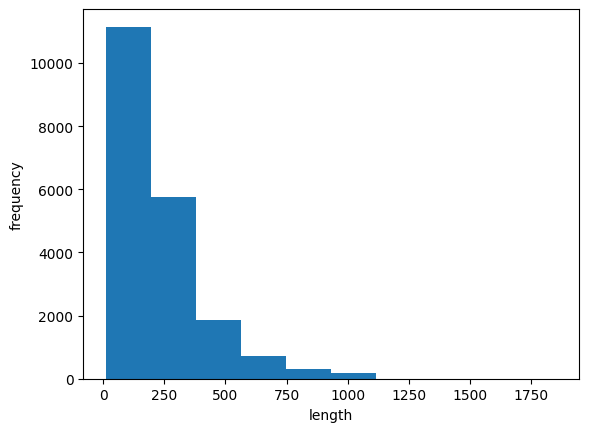

In [55]:
import matplotlib.pyplot as plt

plt.hist(lengths)
plt.xlabel("length")
plt.ylabel("frequency")
plt.show() # 리뷰 길이가 제각각 -> 100단어로 맞추자.

- 시퀀스 패딩 (데이터 전처리)

In [56]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100) # maxlen보다 긴 시퀀스의 앞부분을 잘라냄. 뒷부분을 잘라내고 싶으면 truncating=post로 지정
print(train_seq.shape) # (20000, 100)

print(train_seq[0]) # 100 토큰(단어)보다 긴 리뷰: 토큰 삭제
print(train_seq[5]) # 100 토큰(단어)보다 짧은 리뷰: zero padding
print(train_input[0][-10:])

val_seq = pad_sequences(val_input, maxlen=100)

(20000, 100)
[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]
[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]
[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


- RNN Model

In [57]:
model = keras.Sequential()

model.add(keras.layers.SimpleRNN(8, input_shape=(100, 500))) # Param 500(원핫인코딩으로 인해 100개 단어 -> 500개 어휘사전)*8(뉴런) + 8(순환층)*8 + 8(절편)
model.add(keras.layers.Dense(1, activation='sigmoid'))

# one-hot encoding
# why? 어휘 사전에 단어별로 할당된 숫자는 긍정, 부정 데이터와 별다른 의미이지만 그대로 두면 가중치 계산 시에 결과에 영향을 미친다.
print(train_seq[0])
train_oh = keras.utils.to_categorical(train_seq) # one-hot encoding으로 바꿔준다.
print(train_oh.shape) # (20000, 100, 500)
print(train_oh[0][0][:12])

print(np.sum(train_oh[0][0])) # 전체 비트 중에 1은 하나만 존재한다.

val_oh = keras.utils.to_categorical(val_seq) # 검증 데이터 세트도 one-hot encoding

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]
(20000, 100, 500)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
1.0


In [58]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_9 (SimpleRNN)    (None, 8)                 4072      
                                                                 
 dense_10 (Dense)            (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


- 학습 및 평가

Epoch 1/100
313/313 [==============================] - 6s 18ms/step - loss: 0.7017 - accuracy: 0.4972 - val_loss: 0.6996 - val_accuracy: 0.5048
Epoch 2/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6970 - accuracy: 0.5040 - val_loss: 0.6967 - val_accuracy: 0.5122
Epoch 3/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6938 - accuracy: 0.5133 - val_loss: 0.6946 - val_accuracy: 0.5146
Epoch 4/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6912 - accuracy: 0.5240 - val_loss: 0.6929 - val_accuracy: 0.5186
Epoch 5/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6889 - accuracy: 0.5367 - val_loss: 0.6913 - val_accuracy: 0.5258
Epoch 6/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6868 - accuracy: 0.5465 - val_loss: 0.6898 - val_accuracy: 0.5350
Epoch 7/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6848 - accuracy: 0.5556 - val_loss: 0.6883 - val_accuracy:

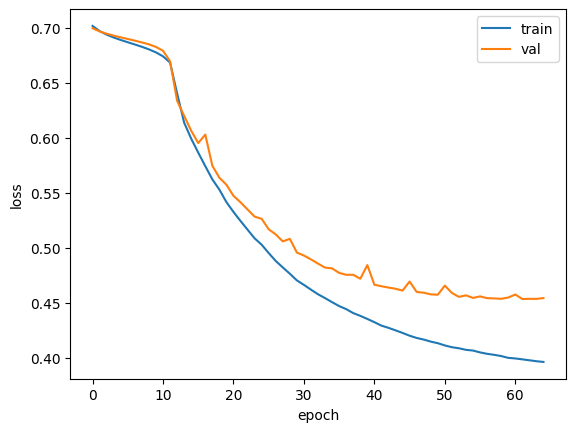

In [59]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(train_oh, train_target, epochs=100, batch_size=64,
                    validation_data=(val_oh, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 워드 임베딩 (Word Embedding)

원-핫 인코딩의 비효율적인 측면을 보완하기 위해 별도로 학습할 수 있는 방법

In [61]:
model2 = keras.Sequential()

model2.add(keras.layers.Embedding(500, 16, input_length=100)) # 어휘 사전 500, 벡터 크기 16
model2.add(keras.layers.SimpleRNN(8)) # 16*8 + 8*8 + 8 = 200 (벡터 크기가 16으로 줄었다.)
model2.add(keras.layers.Dense(1, activation='sigmoid'))

model2.summary()

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model2.h5', save_best_only=True)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

history2 = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 16)           8000      
                                                                 
 simple_rnn_11 (SimpleRNN)   (None, 8)                 200       
                                                                 
 dense_12 (Dense)            (None, 1)                 9         
                                                                 
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


ValueError: in user code:

    File "c:\Python310\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "c:\Python310\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Python310\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "c:\Python310\lib\site-packages\keras\engine\training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "c:\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Python310\lib\site-packages\keras\engine\input_spec.py", line 232, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_13' (type Sequential).
    
    Input 0 of layer "simple_rnn_11" is incompatible with the layer: expected ndim=3, found ndim=4. Full shape received: (None, 100, 500, 16)
    
    Call arguments received by layer 'sequential_13' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 100, 500), dtype=float32)
      • training=True
      • mask=None


# Long Short Term Memory (LSTM)

기본 RNN은 시퀀스 길이가 길 경우 성능이 저하됨. -> 타임스텝이 길어지면 이전 입력 정보가 사라짐

값을 계속 유지한다.

In [ ]:
model3 = keras.Sequential()

model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3)) # LSTM에서 dropout을 사용하는 방법
model3.add(keras.layers.Dense(1, activation='sigmoid'))

model3.summary()

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model3.h5', save_best_only=True)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

history = model3.fit(train_oh, train_target, epochs=100, batch_size=64,
                    validation_data=(val_oh, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_1 (LSTM)               (None, 8)                 800       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


- 2개 층을 연결하는 방법

In [ ]:
model4 = keras.Sequential()

model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True)) # 2개 층 연결
model4.add(keras.layers.LSTM(8, dropout=0.3))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

model3.summary()

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model4.h5', save_best_only=True)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

history = model4.fit(train_oh, train_target, epochs=100, batch_size=64,
                    validation_data=(val_oh, val_target), callbacks=[checkpoint_cb, early_stopping_cb])